In [1]:
import time

In [17]:
def fib(n, verbose=False, depth=0, use_memo=True, memo=None):
    indent = '    ' * depth  # Create indentation based on the depth

    if use_memo:
        if memo is None:
            memo = {}  # Initialize the memo dictionary on the first call

        # Check if the result is already in the memo dictionary
        if n in memo:
            if verbose:
                print(f'{indent}└── @ Memoized result of fib({n}) = {memo[n]}')
            return memo[n]

        if n == 0:
            if verbose:
                print(f'{indent}└── * Result of fib(0) = 0')
            memo[n] = 0
            return 0
        elif n == 1:
            if verbose:
                print(f'{indent}└── * Result of fib(1) = 1')
            memo[n] = 1
            return 1
        else:
            if verbose:
                print(f'{indent}└──fib({n}) : fib({n-1}) + fib({n-2})')
            # Compute the result and store it in the memo dictionary
            result = fib(n-1, verbose, depth + 1, use_memo, memo) + fib(n-2, verbose, depth + 1, use_memo, memo)
            memo[n] = result
            if verbose:
                print(f'{indent}<<── Result of fib({n}) = {result}')
            return result
    else:
        # No memoization, regular recursive computation
        if n == 0:
            if verbose:
                print(f'{indent}└── * Result of fib(0) = 0')
            return 0
        elif n == 1:
            if verbose:
                print(f'{indent}└── * Result of fib(1) = 1')
            return 1
        else:
            if verbose:
                print(f'{indent}└──fib({n}) : fib({n-1}) + fib({n-2})')
            result = fib(n-1, verbose, depth + 1, use_memo) + fib(n-2, verbose, depth + 1, use_memo)
            if verbose:
                print(f'{indent}<<── Result of fib({n}) = {result}')
            return result


In [18]:
fib(6, verbose=True, use_memo=False)

└──fib(6) : fib(5) + fib(4)
    └──fib(5) : fib(4) + fib(3)
        └──fib(4) : fib(3) + fib(2)
            └──fib(3) : fib(2) + fib(1)
                └──fib(2) : fib(1) + fib(0)
                    └── * Result of fib(1) = 1
                    └── * Result of fib(0) = 0
                <<── Result of fib(2) = 1
                └── * Result of fib(1) = 1
            <<── Result of fib(3) = 2
            └──fib(2) : fib(1) + fib(0)
                └── * Result of fib(1) = 1
                └── * Result of fib(0) = 0
            <<── Result of fib(2) = 1
        <<── Result of fib(4) = 3
        └──fib(3) : fib(2) + fib(1)
            └──fib(2) : fib(1) + fib(0)
                └── * Result of fib(1) = 1
                └── * Result of fib(0) = 0
            <<── Result of fib(2) = 1
            └── * Result of fib(1) = 1
        <<── Result of fib(3) = 2
    <<── Result of fib(5) = 5
    └──fib(4) : fib(3) + fib(2)
        └──fib(3) : fib(2) + fib(1)
            └──fib(2) : fib(1) + f

8

In [19]:
fib(6, verbose=True, use_memo=True)

└──fib(6) : fib(5) + fib(4)
    └──fib(5) : fib(4) + fib(3)
        └──fib(4) : fib(3) + fib(2)
            └──fib(3) : fib(2) + fib(1)
                └──fib(2) : fib(1) + fib(0)
                    └── * Result of fib(1) = 1
                    └── * Result of fib(0) = 0
                <<── Result of fib(2) = 1
                └── @ Memoized result of fib(1) = 1
            <<── Result of fib(3) = 2
            └── @ Memoized result of fib(2) = 1
        <<── Result of fib(4) = 3
        └── @ Memoized result of fib(3) = 2
    <<── Result of fib(5) = 5
    └── @ Memoized result of fib(4) = 3
<<── Result of fib(6) = 8


8

In [43]:
results_without_memo = []
for i in range(20):
    start = time.perf_counter()
    fib(i, use_memo=False)
    end = time.perf_counter()
    results_without_memo.append((i,end - start))

In [44]:
results_with_memo = []
for i in range(20):
    start = time.perf_counter()
    fib(i, use_memo=True)
    end = time.perf_counter()
    results_with_memo.append((i,end - start))

In [45]:
import matplotlib.pyplot as plt

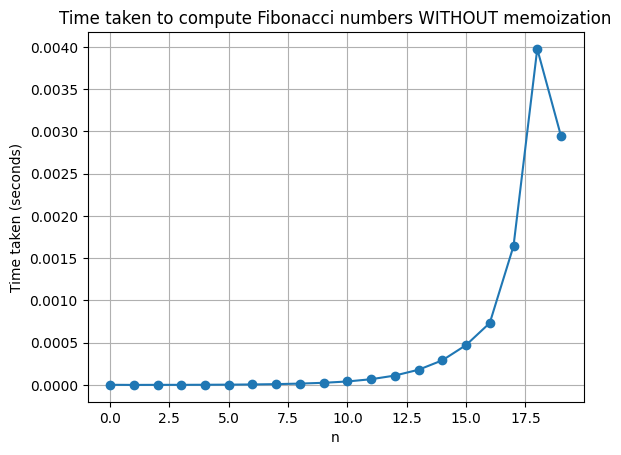

In [46]:
# Unpack the results into two lists: n and time_taken
n, time_taken = zip(*results_without_memo)
# plt.yscale('log')
# Create a plot
plt.plot(n, time_taken, marker='o')
plt.xlabel('n')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken to compute Fibonacci numbers WITHOUT memoization')
plt.grid(True)
plt.show()

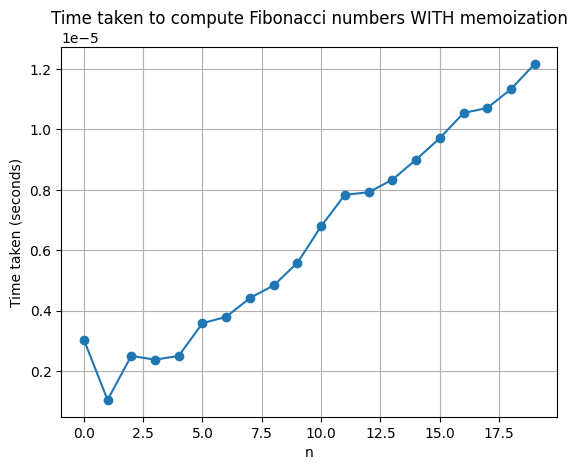

In [47]:
# Unpack the results into two lists: n and time_taken
n, time_taken = zip(*results_with_memo)
# plt.yscale('log')
# Create a plot
plt.plot(n, time_taken, marker='o')
plt.xlabel('n')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken to compute Fibonacci numbers WITH memoization')
plt.grid(True)
plt.show()